In [1]:
# Import depencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# generate 1500 random lats and lons, pair them with "zip" - creates a zip object in memory as a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unpack the lat/lon zip into a list
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.92127864048477 103.14829326708048
-69.30380921684892 -123.62990358144515
22.33771012287403 95.19528401754457
30.687336997687808 -102.25673090788828
29.510891925882248 -42.37777242293578
-88.31262110962689 167.8212551327922
6.88154442898886 -19.28050015239495
20.588138489832346 -84.00484313565414
-46.38194298128465 83.50079127592505
-81.78169701362106 -36.42579832049813
69.2057472728934 -67.95828903493715
1.097739478337374 46.99886891039762
33.00879648871479 -90.16368458664532
-10.372086538842453 -126.86179072497042
-27.967109143149365 154.26850857058156
-16.481498791644327 -129.56886509771476
32.1722887049489 -46.16682699990733
48.23763341085373 -115.30263682353831
-87.69574041485464 80.72650540463246
-87.6978781896932 179.86087353705415
45.65646005020474 -99.38420655438101
-10.814425283759533 95.43463105785054
68.92710520175478 -15.754767197694974
49.857051652919154 6.639354136206805
-86.90835184513482 13.068205542578198
-77.14953785802898 11.216622920585536
-73.90745306764407 9.58

-0.21706708144984077 121.99519079131005
-43.827320600838824 142.62636319706473
-3.749647421415105 -163.09696386922542
0.963208934901516 -41.894069290490336
-83.16374992074488 -48.79310819709954
29.7386789744737 -164.52639853083463
8.93590994279947 -60.45662720023904
-72.31981131407564 65.5998713519875
11.490526774843318 -106.68219124637024
49.96373497486675 45.9009811376165
7.915359738899738 15.671712178978282
84.72861614891394 95.27857350858869
-0.7162689658361643 -113.19979108554709
5.159431278076397 100.39694975659927
34.55746557763851 -21.54647445086067
79.32785626871504 24.131934757941053
2.2683090549795537 -94.29759919972005
-59.085409152531504 -77.69628064029561
-66.28424879618684 27.953004095383193
74.25156459244295 -172.0000934209346
-86.91731093170002 -55.12235829533432
62.04222604603817 105.43465499871627
-12.605810745512912 -171.11614050927713
60.663766995880025 -144.8973182937376
65.05679625878832 -93.0620494303104
-72.80690322834225 -51.73140303714271
-20.09043899127741 -

In [5]:
# Import citipy
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Retrieve the data for 500 cities

# Import additional dependencies
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.(results: error message "Nothing to geocode")
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f22af6e6486545604e20f5bfafca49eb


In [11]:
# Loop through all the cities in our list.
# Original code: "for i in range(len(cities)):" changed to "for i, city in enumerate(cities):" to reference the
#   index and the city in the list

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Try and Except block
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | wuwei
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | monywa
Processing Record 4 of Set 1 | odessa
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | bubaque
Processing Record 8 of Set 1 | guane
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | mogadishu
Processing Record 13 of Set 1 | yazoo city
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | gold coast
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | whitefish
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | aberdeen
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | husavik
Processing Record 22 of Set 1 | trier
Processing Record 23 of Set 1 | bredasdorp
Processing Record 24 of Set 1 | hermanus
Processing Record 25 of Set 1

Processing Record 36 of Set 4 | bambous virieux
Processing Record 37 of Set 4 | yarada
Processing Record 38 of Set 4 | gobabis
Processing Record 39 of Set 4 | akdagmadeni
Processing Record 40 of Set 4 | kahului
Processing Record 41 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | teguise
Processing Record 44 of Set 4 | ibotirama
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | pisco
Processing Record 49 of Set 4 | karratha
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | serebryansk
Processing Record 4 of Set 5 | nuuk
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | south lake tahoe
Processing Record 7 of Set 5 | sal rei
Processing Record 8 of Set 5 | sibu
Processing Record 9 of Set 5 | an

Processing Record 27 of Set 8 | ishigaki
Processing Record 28 of Set 8 | suntar
Processing Record 29 of Set 8 | zhigansk
Processing Record 30 of Set 8 | isangel
Processing Record 31 of Set 8 | mudgee
Processing Record 32 of Set 8 | longlac
City not found. Skipping...
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | russell
Processing Record 35 of Set 8 | baruun-urt
Processing Record 36 of Set 8 | mersing
Processing Record 37 of Set 8 | mount pleasant
Processing Record 38 of Set 8 | garhi khairo
Processing Record 39 of Set 8 | southbridge
Processing Record 40 of Set 8 | along
Processing Record 41 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 42 of Set 8 | jacareacanga
Processing Record 43 of Set 8 | esmeraldas
Processing Record 44 of Set 8 | cozumel
Processing Record 45 of Set 8 | henties bay
Processing Record 46 of Set 8 | cortland
Processing Record 47 of Set 8 | inhambane
Processing Record 48 of Set 8 | zachagansk
City not found. Skipping...


Processing Record 13 of Set 12 | erenhot
Processing Record 14 of Set 12 | goderich
Processing Record 15 of Set 12 | moerai
Processing Record 16 of Set 12 | toora-khem
Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | lagos
Processing Record 19 of Set 12 | eyl
Processing Record 20 of Set 12 | auki
Processing Record 21 of Set 12 | ituporanga
Processing Record 22 of Set 12 | quang ngai
Processing Record 23 of Set 12 | ponta delgada
Processing Record 24 of Set 12 | dongsheng
Processing Record 25 of Set 12 | diffa
Processing Record 26 of Set 12 | seydi
Processing Record 27 of Set 12 | talaya
Processing Record 28 of Set 12 | yamada
Processing Record 29 of Set 12 | izhma
Processing Record 30 of Set 12 | jieshi
Processing Record 31 of Set 12 | havelock
Processing Record 32 of Set 12 | hofn
Processing Record 33 of Set 12 | sao paulo de olivenca
Processing Record 34 of Set 12 | karema
Processing Record 35 of Set 12 | shelburne
Processing Record 36 of Set 12 | samana
Pr

In [12]:
# ON WITH THE SHOW  Create a DataFrame of City Weather Data

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wuwei,37.9281,102.6414,49.28,45,100,2.13,CN,2022-10-23 20:57:04
1,Rikitea,-23.1203,-134.9692,72.79,79,100,11.90,PF,2022-10-23 20:52:42
2,Monywa,22.1167,95.1333,76.77,86,100,2.06,MM,2022-10-23 20:57:04
3,Odessa,46.4775,30.7326,57.27,75,61,12.64,UA,2022-10-23 20:53:50
4,Ribeira Grande,38.5167,-28.7000,64.80,68,40,7.00,PT,2022-10-23 20:54:46
5,Bluff,-46.6000,168.3333,46.98,80,100,19.33,NZ,2022-10-23 20:57:06
6,Bubaque,11.2833,-15.8333,83.19,72,100,4.70,GW,2022-10-23 20:57:06
7,Guane,22.2025,-84.0875,82.60,66,19,6.24,CU,2022-10-23 20:57:07
8,Busselton,-33.6500,115.3333,55.87,91,60,10.49,AU,2022-10-23 20:57:07
9,Ushuaia,-54.8000,-68.3000,49.66,71,75,8.05,AR,2022-10-23 20:55:22


In [15]:
# Reorder the columns as prescribed
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wuwei,CN,2022-10-23 20:57:04,37.9281,102.6414,49.28,45,100,2.13
1,Rikitea,PF,2022-10-23 20:52:42,-23.1203,-134.9692,72.79,79,100,11.90
2,Monywa,MM,2022-10-23 20:57:04,22.1167,95.1333,76.77,86,100,2.06
3,Odessa,UA,2022-10-23 20:53:50,46.4775,30.7326,57.27,75,61,12.64
4,Ribeira Grande,PT,2022-10-23 20:54:46,38.5167,-28.7000,64.80,68,40,7.00
5,Bluff,NZ,2022-10-23 20:57:06,-46.6000,168.3333,46.98,80,100,19.33
6,Bubaque,GW,2022-10-23 20:57:06,11.2833,-15.8333,83.19,72,100,4.70
7,Guane,CU,2022-10-23 20:57:07,22.2025,-84.0875,82.60,66,19,6.24
8,Busselton,AU,2022-10-23 20:57:07,-33.6500,115.3333,55.87,91,60,10.49
9,Ushuaia,AR,2022-10-23 20:55:22,-54.8000,-68.3000,49.66,71,75,8.05


In [16]:
# Create an output .csv file in a new folder called "weather_data"

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Making Scatter Plots of the weather data
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

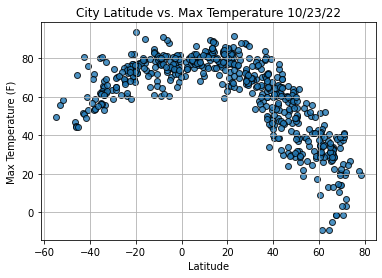

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

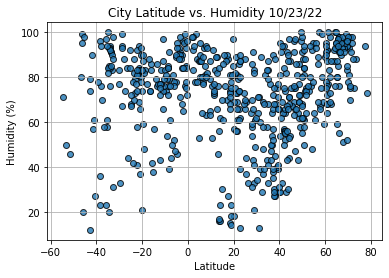

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

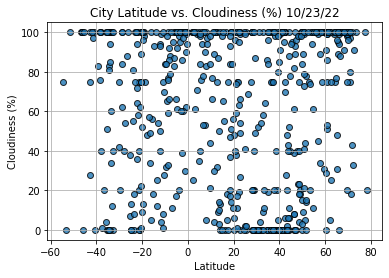

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

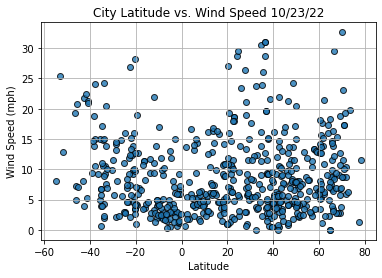

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()